In [47]:
import pandas as pd
from pathlib import Path
import shutil

# Paths
base_dir = Path(r"D:\rtx")
attr_file = base_dir / "list_attr_celeba.csv"
img_dir = Path(r"D:\rtx\img_align_celeba\img_align_celeba")  # <-- path to your images
output_dir = base_dir / "subset_celeba"
output_dir.mkdir(exist_ok=True)

# Load attributes
df = pd.read_csv(attr_file)
df.set_index("image_id", inplace=True)
print(f"Total images in CelebA: {len(df)}")

# Select first 1,000 images
filtered_df = df.head(100)

# Copy images to subset folder
copied = 0
for img_name in filtered_df.index:
    src = img_dir / img_name
    dst = output_dir / img_name
    if src.exists():
        shutil.copy(src, dst)
        copied += 1

print(f"✅ Copied {copied} images to {output_dir}")


Total images in CelebA: 202599
✅ Copied 100 images to D:\rtx\subset_celeba


In [48]:
import pandas as pd
from pathlib import Path

# Paths
attr_path = Path(r"D:\rtx\list_attr_celeba.csv")
subset_dir = Path(r"D:\rtx\subset_celeba")

# Load attributes
df = pd.read_csv(attr_path)

# Keep only images in subset
subset_files = [f.name for f in subset_dir.glob("*.jpg")]
df_subset = df[df["image_id"].isin(subset_files)].reset_index(drop=True)

print("Subset attribute table shape:", df_subset.shape)
df_subset.head()


Subset attribute table shape: (10000, 41)


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [49]:
# Copy and convert -1 to 0
attr_cols = df_subset.columns[1:]  # exclude image_id
df_subset[attr_cols] = (df_subset[attr_cols] == 1).astype(int)

df_subset.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [50]:
df_subset.to_csv(r"D:\rtx\subset_attributes.csv", index=False)

In [51]:
df_subset

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,009996.jpg,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9996,009997.jpg,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,1
9997,009998.jpg,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
9998,009999.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1


In [52]:
!pip install matplotlib pillow

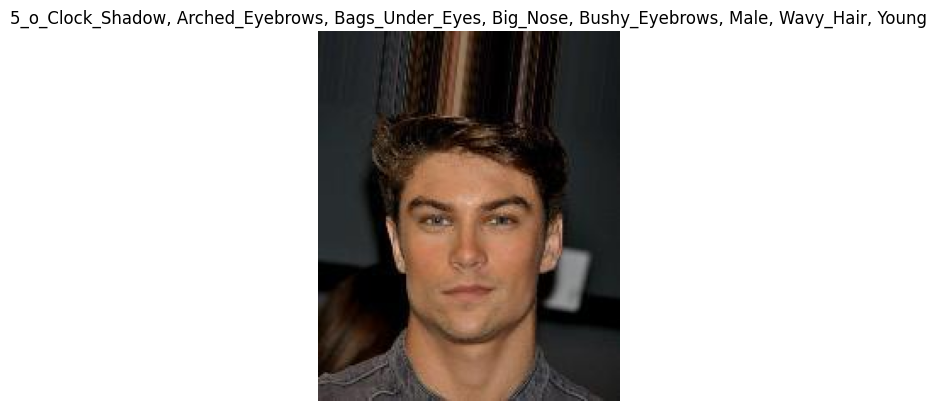

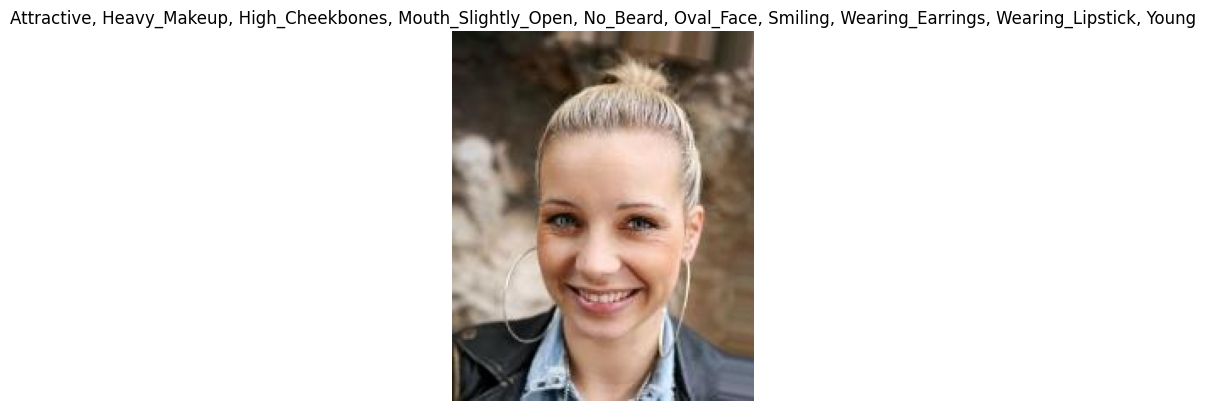

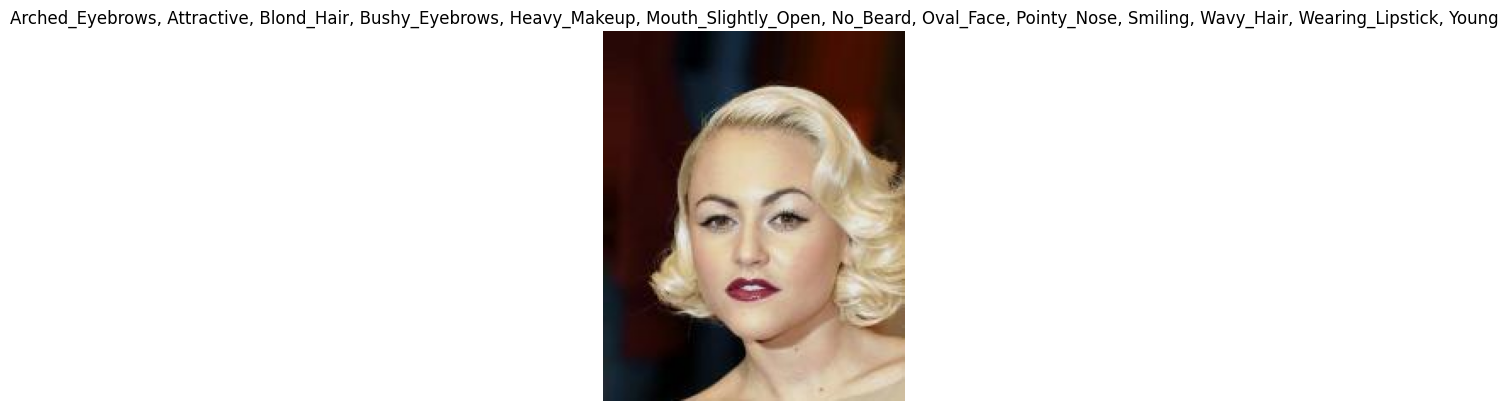

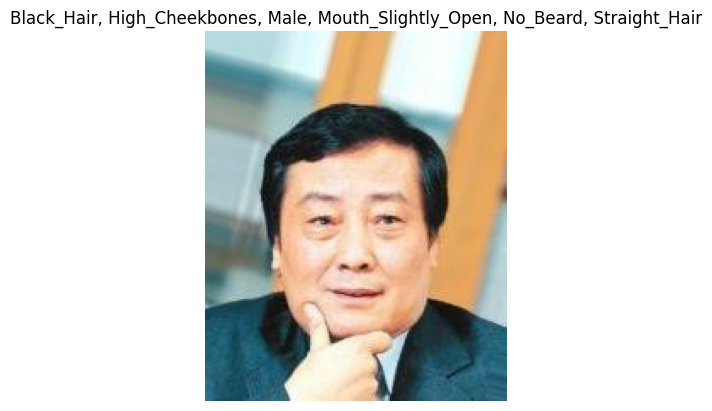

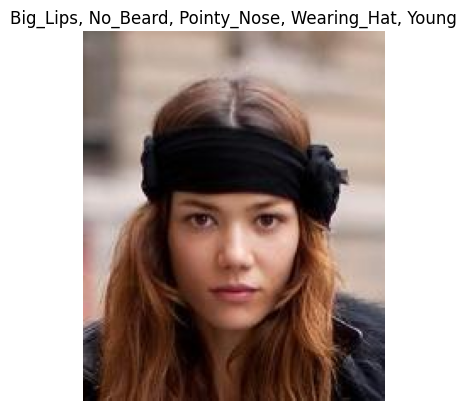

In [53]:
import matplotlib.pyplot as plt
import random
from PIL import Image

sample = df_subset.sample(5, random_state=42)

for _, row in sample.iterrows():
    img_path = subset_dir / row["image_id"]
    img = Image.open(img_path)
    
    attrs = [col for col in attr_cols if row[col] == 1]
    
    plt.imshow(img)
    plt.axis("off")
    plt.title(", ".join(attrs))
    plt.show()


In [54]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from pathlib import Path

# Paths
subset_dir = Path(r"D:\rtx\subset_celeba")
attr_csv = Path(r"D:\rtx\subset_attributes.csv")

# Load attributes
df_subset = pd.read_csv(attr_csv)
attr_cols = df_subset.columns[1:]  # exclude image_id

# Ensure numeric type
df_subset[attr_cols] = df_subset[attr_cols].apply(pd.to_numeric)

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64,64)),   # small size for faster training
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # scale to [-1,1]
])

# Dataset
class CelebASubsetDataset(Dataset):
    def __init__(self, img_dir, attr_df, transform=None):
        self.img_dir = img_dir
        self.attr_df = attr_df
        self.transform = transform

    def __len__(self):
        return len(self.attr_df)

    def __getitem__(self, idx):
        row = self.attr_df.iloc[idx]
        img_path = self.img_dir / row["image_id"]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        # Convert all attribute values to float
        labels = row[1:].astype(float).values
        labels = torch.tensor(labels, dtype=torch.float)
        return img, labels



# DataLoader
dataset = CelebASubsetDataset(subset_dir, df_subset, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [55]:
import torch.nn as nn

class AGANGenerator(nn.Module):
    def __init__(self, z_dim=100, attr_dim=40, img_channels=3, img_size=64):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(z_dim + attr_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, img_channels * img_size * img_size),
            nn.Tanh()
        )
        self.img_channels = img_channels
        self.img_size = img_size

    def forward(self, z, attr):
        x = torch.cat([z, attr], dim=1)
        x = self.fc(x)
        x = x.view(-1, self.img_channels, self.img_size, self.img_size)
        return x

class AGANDiscriminator(nn.Module):
    def __init__(self, attr_dim=40, img_channels=3, img_size=64):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(img_channels * img_size * img_size + attr_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        self.img_channels = img_channels
        self.img_size = img_size

    def forward(self, img, attr):
        x = img.view(img.size(0), -1)
        x = torch.cat([x, attr], dim=1)
        return self.fc(x)


In [56]:
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

G = AGANGenerator().to(device)
D = AGANDiscriminator().to(device)

criterion = nn.BCELoss()
lr = 0.0002

optimizerG = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

num_epochs = 50
z_dim = 100

for epoch in range(num_epochs):
    for imgs, attrs in dataloader:
        batch_size = imgs.size(0)
        imgs, attrs = imgs.to(device), attrs.to(device)

        # Real labels = 1, Fake labels = 0
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # -----------------
        # Train Discriminator
        # -----------------
        optimizerD.zero_grad()

        outputs_real = D(imgs, attrs)
        d_loss_real = criterion(outputs_real, real_labels)

        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z, attrs)
        outputs_fake = D(fake_imgs.detach(), attrs)
        d_loss_fake = criterion(outputs_fake, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizerD.step()

        # -----------------
        # Train Generator
        # -----------------
        optimizerG.zero_grad()
        outputs_fake = D(fake_imgs, attrs)
        g_loss = criterion(outputs_fake, real_labels)
        g_loss.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [1/50] | D Loss: 0.0573 | G Loss: 5.0811
Epoch [2/50] | D Loss: 0.5839 | G Loss: 3.3518
Epoch [3/50] | D Loss: 0.3903 | G Loss: 1.3529
Epoch [4/50] | D Loss: 0.0771 | G Loss: 3.9411
Epoch [5/50] | D Loss: 0.8200 | G Loss: 3.3286
Epoch [6/50] | D Loss: 0.2254 | G Loss: 4.4569
Epoch [7/50] | D Loss: 0.6449 | G Loss: 4.9168
Epoch [8/50] | D Loss: 0.3061 | G Loss: 3.5095
Epoch [9/50] | D Loss: 0.4900 | G Loss: 2.7506
Epoch [10/50] | D Loss: 0.5361 | G Loss: 2.1768
Epoch [11/50] | D Loss: 0.6750 | G Loss: 2.3064
Epoch [12/50] | D Loss: 0.3551 | G Loss: 2.9869
Epoch [13/50] | D Loss: 0.4400 | G Loss: 3.0440
Epoch [14/50] | D Loss: 0.8493 | G Loss: 2.5125
Epoch [15/50] | D Loss: 0.5380 | G Loss: 4.7082
Epoch [16/50] | D Loss: 0.3889 | G Loss: 3.1375
Epoch [17/50] | D Loss: 0.9011 | G Loss: 2.1924
Epoch [18/50] | D Loss: 0.8989 | G Loss: 2.7622
Epoch [19/50] | D Loss: 0.9074 | G Loss: 1.6601
Epoch [20/50] | D Loss: 0.6441 | G Loss: 2.3220
Epoch [21/50] | D Loss: 0.8756 | G Loss: 2.3267
E

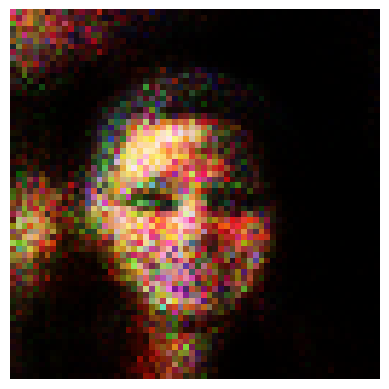

In [63]:
import matplotlib.pyplot as plt

# Example description
desc = "Male, Bald, Mustache, Wearing_Necktie"
desc_list = [d.strip() for d in desc.split(",")]

# Convert description to attribute vector
attr_vector = torch.zeros(1, len(attr_cols)).to(device)
for i, col in enumerate(attr_cols):
    if col in desc_list:
        attr_vector[0, i] = 1

# Sample random noise
z = torch.randn(1, z_dim).to(device)

# Generate image
G.eval()  # evaluation mode
with torch.no_grad():
    fake_img = G(z, attr_vector)

# Display
img = (fake_img[0].permute(1,2,0).cpu().numpy() + 1)/2  # scale [-1,1] -> [0,1]
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
''' # -------------------------
# 1️⃣ Imports and Setup
# -------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from pathlib import Path
import shutil
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

# -------------------------
# 2️⃣ Create subset of 1k images
# -------------------------
base_dir = Path(r"D:\rtx")
attr_file = base_dir / "list_attr_celeba.csv"
img_dir = base_dir / "img_align_celeba\img_align_celeba"
output_dir = base_dir / "subset_celeba"
output_dir.mkdir(exist_ok=True)

df = pd.read_csv(attr_file)
df.set_index("image_id", inplace=True)
subset_df = df.head(1000)  # first 1000 images

# Copy images
for img_name in subset_df.index:
    src = img_dir / img_name
    dst = output_dir / img_name
    if src.exists():
        shutil.copy(src, dst)

# Prepare attributes
subset_files = [f.name for f in output_dir.glob("*.jpg")]
df_subset = df[df.index.isin(subset_files)].reset_index()
attr_cols = df_subset.columns[1:]  # exclude image_id
df_subset[attr_cols] = (df_subset[attr_cols] == 1).astype(int)
df_subset.to_csv(base_dir / "subset_attributes.csv", index=False)

# -------------------------
# 3️⃣ Dataset Class
# -------------------------
class CelebASubsetDataset(Dataset):
    def __init__(self, img_dir, attr_csv, transform=None):
        self.img_dir = Path(img_dir)
        self.df = pd.read_csv(attr_csv)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = self.img_dir / row["image_id"]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        labels = torch.tensor(row[1:].values.astype('float32'))  # 40-dim attributes
        return img, labels

# -------------------------
# 4️⃣ Transforms & DataLoader
# -------------------------
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # [-1,1]
])

dataset = CelebASubsetDataset(output_dir, base_dir / "subset_attributes.csv", transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

# -------------------------
# 5️⃣ AGAN Model (CNN-based)
# -------------------------
z_dim = 100
attr_dim = 40
img_channels = 3

class AGANGenerator(nn.Module):
    def __init__(self, z_dim=100, attr_dim=40, img_channels=3):
        super().__init__()
        self.fc = nn.Linear(z_dim+attr_dim, 256*4*4)
        self.main = nn.Sequential(
            nn.ConvTranspose2d(256,128,4,2,1), nn.BatchNorm2d(128), nn.ReLU(True),
            nn.ConvTranspose2d(128,64,4,2,1), nn.BatchNorm2d(64), nn.ReLU(True),
            nn.ConvTranspose2d(64,32,4,2,1), nn.BatchNorm2d(32), nn.ReLU(True),
            nn.ConvTranspose2d(32,img_channels,4,2,1), nn.Tanh()
        )

    def forward(self, z, attr):
        x = torch.cat([z, attr], dim=1)
        x = self.fc(x).view(-1,256,4,4)
        return self.main(x)

class AGANDiscriminator(nn.Module):
    def __init__(self, attr_dim=40, img_channels=3):
        super().__init__()
        self.img_branch = nn.Sequential(
            nn.Conv2d(img_channels,32,4,2,1), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32,64,4,2,1), nn.BatchNorm2d(64), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64,128,4,2,1), nn.BatchNorm2d(128), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128,256,4,2,1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2, inplace=True)
        )
        self.fc = nn.Linear(256*4*4 + attr_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, img, attr):
        x = self.img_branch(img).view(img.size(0), -1)
        x = torch.cat([x, attr], dim=1)
        return self.sigmoid(self.fc(x))

# -------------------------
# 6️⃣ Initialize models & optimizer
# -------------------------
G = AGANGenerator(z_dim, attr_dim, img_channels).to(device)
D = AGANDiscriminator(attr_dim, img_channels).to(device)

criterion = nn.BCELoss()
lr = 0.0002
optimizerG = optim.Adam(G.parameters(), lr=lr, betas=(0.5,0.999))
optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(0.5,0.999))

# -------------------------
# 7️⃣ Training loop
# -------------------------
num_epochs = 50
for epoch in range(num_epochs):
    for imgs, attrs in dataloader:
        batch_size = imgs.size(0)
        imgs, attrs = imgs.to(device), attrs.to(device)
        real_labels = torch.ones(batch_size,1).to(device)
        fake_labels = torch.zeros(batch_size,1).to(device)

        # Train Discriminator
        optimizerD.zero_grad()
        outputs_real = D(imgs, attrs)
        d_loss_real = criterion(outputs_real, real_labels)
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z, attrs)
        outputs_fake = D(fake_imgs.detach(), attrs)
        d_loss_fake = criterion(outputs_fake, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizerD.step()

        # Train Generator
        optimizerG.zero_grad()
        outputs_fake = D(fake_imgs, attrs)
        g_loss = criterion(outputs_fake, real_labels)
        g_loss.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

# -------------------------
# 8️⃣ Generate images from text description
# -------------------------
def generate_image_from_text(desc, num_variations=1):
    desc_list = [d.strip() for d in desc.split(",")]
    attr_vector = torch.zeros(1, attr_dim).to(device)
    for i, col in enumerate(attr_cols):
        if col in desc_list:
            attr_vector[0,i] = 1
    G.eval()
    for i in range(num_variations):
        z = torch.randn(1, z_dim).to(device)
        with torch.no_grad():
            fake_img = G(z, attr_vector)
        img = (fake_img[0].permute(1,2,0).cpu().numpy() + 1)/2
        plt.imshow(img)
        plt.axis("off")
        plt.title(desc)
        plt.show()

# Example usage
generate_image_from_text("Male, Black_Hair, Smiling", num_variations=3) '''
